Data Preparation

In [191]:
# https://www.kaggle.com/code/yassinesfaihi/lstm-s-p500-stocks-time-series-forecasting/notebook#Evaluate-the-model

import pandas as pd
import numpy as np
import os
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import yfinance as yf
import ta
import matplotlib.pyplot as plt

In [192]:
folder_path_bert = 'E:\\Dokumen\\S2-Perkuliahan\\_Proposal FIx\\Program\\PENELITIAN_FIX\\BERT'  # Ganti dengan path folder yang sesuai
file_path_bert = os.path.join(folder_path_bert, '4.FinalResultSentimen.csv')

In [193]:
#mengambi data sentimen dari folder_part_bert
df_sentimen = pd.read_csv(file_path_bert)
df_sentimen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2769 entries, 0 to 2768
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      2769 non-null   object 
 1   Tweet     2769 non-null   object 
 2   Sentimen  2769 non-null   float64
dtypes: float64(1), object(2)
memory usage: 65.0+ KB


In [194]:
df_sentimen.head()

,Date,Tweet,Sentimen
0,2020-07-22 10:23:25+00:00,barusan cek bursa karena seharian full istirah...,0.310727
1,2020-07-23 08:38:17+00:00,ah bbri kapan kau kyk kimiafarma,0.064664
2,2020-07-23 12:17:39+00:00,anyinglah bbri aing nyangkut untung sedikit bi...,0.028234
3,2020-07-24 03:58:46+00:00,asing gempur telkom ritel tampung the next bbri,0.514676
4,2020-07-26 04:54:50+00:00,kapan bumn konstruksi mulai bikin anak cucu sa...,0.059208


In [195]:
df_sentimen.tail()

,Date,Tweet,Sentimen
2764,2022-12-30 02:37:55+00:00,bbri akan membagi dividen interim tahun buku 2...,0.998930
2765,2022-12-30 03:44:49+00:00,teamjds ada yang udah akum bbri awal tahun mau...,0.996459
2766,2022-12-30 04:15:31+00:00,investor bbri bergembira dapat dividen interim...,0.860599
2767,2022-12-30 07:47:27+00:00,terima kasih 2022 untuk itmg asii medc abmm ps...,0.999397
2768,2022-12-30 13:04:36+00:00,akhirnya bbri kujual juga depan bisa beli lagi...,0.995887


In [196]:
df_sentimen['Date'] = pd.to_datetime(df_sentimen['Date'])
df_sentimen['Date'] = df_sentimen['Date'].dt.date
df_sentimen.head()

,Date,Tweet,Sentimen
0,2020-07-22,barusan cek bursa karena seharian full istirah...,0.310727
1,2020-07-23,ah bbri kapan kau kyk kimiafarma,0.064664
2,2020-07-23,anyinglah bbri aing nyangkut untung sedikit bi...,0.028234
3,2020-07-24,asing gempur telkom ritel tampung the next bbri,0.514676
4,2020-07-26,kapan bumn konstruksi mulai bikin anak cucu sa...,0.059208


In [197]:
# Mengonversi kolom "Tanggal" menjadi tipe datetime
df_sentimen['Date'] = pd.to_datetime(df_sentimen['Date'])
# Mengelompokkan data berdasarkan tanggal dan menjumlahkannya
jumlah_data_per_tanggal = df_sentimen.groupby('Date')['Sentimen'].sum()
# Menghitung jumlah data pada setiap tanggal
jumlah_data = df_sentimen['Date'].value_counts()
# Membagi hasil jumlah data per tanggal dengan jumlah data pada setiap tanggal
rata_rata_data_per_tanggal = jumlah_data_per_tanggal / jumlah_data
# Menampilkan hasil
df_Sentimenskor = pd.DataFrame(rata_rata_data_per_tanggal)
df_Sentimenskor = df_Sentimenskor.rename(columns={0: 'SkorSentimen'})
df_Sentimenskor.head()

,SkorSentimen
Date,
2020-07-22,0.310727
2020-07-23,0.046449
2020-07-24,0.514676
2020-07-26,0.517581
2020-07-27,0.998283


In [198]:
# Mengambil data saham menggunakan yfinance
df = yf.download('BBRI.JK', start='2020-07-22', end='2022-12-30')
df = df.asfreq('D')
df = df.sort_index()
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-07-22,2872.677734,2881.768311,2809.042480,2818.133057,2363.973145,190916547.0
2020-07-23,2836.314697,2872.677734,2818.133057,2854.496094,2394.476074,162646279.0
2020-07-24,2845.405518,2854.496094,2809.042480,2809.042480,2356.347656,104287961.0
2020-07-25,NaN,NaN,NaN,NaN,NaN,NaN
2020-07-26,NaN,NaN,NaN,NaN,NaN,NaN


In [199]:
df = df.apply(lambda col : col.rolling(window=4, min_periods = 1).mean())
df = df.fillna(method='bfill')
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-07-22,2872.677734,2881.768311,2809.042480,2818.133057,2363.973145,190916547.0
2020-07-23,2854.496216,2877.223022,2813.587769,2836.314575,2379.224609,176781413.0
2020-07-24,2851.465983,2869.647380,2812.072673,2827.223877,2371.598958,152616929.0
2020-07-25,2851.465983,2869.647380,2812.072673,2827.223877,2371.598958,152616929.0
2020-07-26,2840.860107,2863.586914,2813.587769,2831.769287,2375.411865,133467120.0


In [200]:
df_Sentimenskor.index = pd.to_datetime(df_Sentimenskor.index)
df = pd.merge(df, df_Sentimenskor, on='Date', how='left')
df.head()

,Open,High,Low,Close,Adj Close,Volume,SkorSentimen
Date,,,,,,,
2020-07-22,2872.677734,2881.768311,2809.042480,2818.133057,2363.973145,190916547.0,0.310727
2020-07-23,2854.496216,2877.223022,2813.587769,2836.314575,2379.224609,176781413.0,0.046449
2020-07-24,2851.465983,2869.647380,2812.072673,2827.223877,2371.598958,152616929.0,0.514676
2020-07-25,2851.465983,2869.647380,2812.072673,2827.223877,2371.598958,152616929.0,NaN
2020-07-26,2840.860107,2863.586914,2813.587769,2831.769287,2375.411865,133467120.0,0.517581


In [201]:
# # Menggunakan teknik rata-rata untuk mengisi nilai kosong
# mean_column = df.mean()
# df = df.fillna(mean_column)

# missing_value_sum = df.isna().sum()
# print(missing_value_sum)

In [202]:
df['RSI']     = ta.momentum.RSIIndicator(df['Close']).rsi()

df['MA_5']    = ta.trend.SMAIndicator(df['Close'], window=5).sma_indicator()
df['MA_10']   = ta.trend.SMAIndicator(df['Close'], window=10).sma_indicator()
df['MA_20']   = ta.trend.SMAIndicator(df['Close'], window=20).sma_indicator()

df['S_Osci']  = ta.momentum.StochasticOscillator(df['High'], df['Low'], df['Close']).stoch()

In [203]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,SkorSentimen,RSI,MA_5,MA_10,MA_20,S_Osci
Date,,,,,,,,,,,,
2022-12-25,4915.0,4955.0,4890.000000,4920.000000,4394.192139,7.033600e+07,NaN,59.191175,4919.166667,4937.250000,4897.625000,72.727273
2022-12-26,4910.0,4935.0,4885.000000,4905.000000,4380.795166,4.846585e+07,0.666741,55.989224,4915.500000,4931.750000,4899.125000,58.333333
2022-12-27,4915.0,4940.0,4875.000000,4900.000000,4376.329590,5.885245e+07,0.500078,54.922695,4909.000000,4926.083333,4902.291667,48.936170
2022-12-28,4900.0,4920.0,4853.333333,4873.333333,4352.512858,7.853913e+07,0.982520,49.506277,4901.666667,4918.916667,4904.083333,25.146199
2022-12-29,4880.0,4907.5,4840.000000,4872.500000,4351.768555,8.557702e+07,0.997070,49.342514,4894.166667,4908.666667,4906.958333,23.214286


In [204]:
missing_value_sum = df.isna().sum()
print(missing_value_sum)

Open              0
High              0
Low               0
Close             0
Adj Close         0
Volume            0
SkorSentimen    217
RSI              13
MA_5              4
MA_10             9
MA_20            19
S_Osci           13
dtype: int64


In [205]:
df = df.apply(lambda col : col.rolling(window=4, min_periods = 1).mean())
df = df.fillna(method='bfill')
df.head()

,Open,High,Low,Close,Adj Close,Volume,SkorSentimen,RSI,MA_5,MA_10,MA_20,S_Osci
Date,,,,,,,,,,,,
2020-07-22,2872.677734,2881.768311,2809.042480,2818.133057,2363.973145,1.909165e+08,0.310727,35.846908,2828.132935,2839.875181,2822.867904,30.952363
2020-07-23,2863.586975,2879.495667,2811.315125,2827.223816,2371.598877,1.838490e+08,0.178588,35.846908,2828.132935,2839.875181,2822.867904,30.952363
2020-07-24,2859.546644,2876.212904,2811.567641,2827.223836,2371.598904,1.734383e+08,0.290617,35.846908,2828.132935,2839.875181,2822.867904,30.952363
2020-07-25,2857.526479,2874.571523,2811.693899,2827.223846,2371.598918,1.682330e+08,0.290617,35.846908,2828.132935,2839.875181,2822.867904,30.952363
2020-07-26,2849.572072,2870.026174,2812.830221,2830.632904,2374.458598,1.538706e+08,0.359568,35.846908,2828.132935,2839.875181,2822.867904,30.952363


In [206]:
missing_value_sum = df.isna().sum()
print(missing_value_sum)

Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
SkorSentimen    0
RSI             0
MA_5            0
MA_10           0
MA_20           0
S_Osci          0
dtype: int64


In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 891 entries, 2020-07-22 to 2022-12-29
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          891 non-null    float64
 1   High          891 non-null    float64
 2   Low           891 non-null    float64
 3   Close         891 non-null    float64
 4   Adj Close     891 non-null    float64
 5   Volume        891 non-null    float64
 6   SkorSentimen  891 non-null    float64
 7   RSI           891 non-null    float64
 8   MA_5          891 non-null    float64
 9   MA_10         891 non-null    float64
 10  MA_20         891 non-null    float64
 11  S_Osci        891 non-null    float64
dtypes: float64(12)
memory usage: 90.5 KB


NORMALISASI DATA

In [208]:
fiturSelect = ['Close','High','Low','Open','Adj Close','Volume','RSI','MA_5','MA_10','MA_20','S_Osci','SkorSentimen']

In [209]:
# Normalize the data (this is optional, but it can help improve the performance of the model)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[fiturSelect] = scaler.fit_transform(df[fiturSelect])
df.head()

,Open,High,Low,Close,Adj Close,Volume,SkorSentimen,RSI,MA_5,MA_10,MA_20,S_Osci
Date,,,,,,,,,,,,
2020-07-22,0.031593,0.020848,0.039428,0.026858,0.023439,0.262161,0.310480,0.26242,0.020252,0.014975,0.0,0.3172
2020-07-23,0.027322,0.019783,0.040475,0.030989,0.027045,0.248093,0.178226,0.26242,0.020252,0.014975,0.0,0.3172
2020-07-24,0.025423,0.018246,0.040591,0.030989,0.027045,0.227371,0.290353,0.26242,0.020252,0.014975,0.0,0.3172
2020-07-25,0.024474,0.017477,0.040650,0.030989,0.027045,0.217009,0.290353,0.26242,0.020252,0.014975,0.0,0.3172
2020-07-26,0.020736,0.015348,0.041173,0.032539,0.028397,0.188421,0.359365,0.26242,0.020252,0.014975,0.0,0.3172


LSTM

In [210]:
df_LSTM = df[['Open','High','Low','Close','Adj Close','Volume']]
df_LSTM.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-07-22,0.031593,0.020848,0.039428,0.026858,0.023439,0.262161
2020-07-23,0.027322,0.019783,0.040475,0.030989,0.027045,0.248093
2020-07-24,0.025423,0.018246,0.040591,0.030989,0.027045,0.227371
2020-07-25,0.024474,0.017477,0.040650,0.030989,0.027045,0.217009
2020-07-26,0.020736,0.015348,0.041173,0.032539,0.028397,0.188421


In [211]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target (y)
X = df_LSTM.drop('Close', axis=1)
y = df_LSTM['Close']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [212]:
X_train.head(10)

,Open,High,Low,Adj Close,Volume
Date,,,,,
2020-07-22,0.031593,0.020848,0.039428,0.023439,0.262161
2020-07-23,0.027322,0.019783,0.040475,0.027045,0.248093
2020-07-24,0.025423,0.018246,0.040591,0.027045,0.227371
2020-07-25,0.024474,0.017477,0.040650,0.027045,0.217009
2020-07-26,0.020736,0.015348,0.041173,0.028397,0.188421
2020-07-27,0.017532,0.013219,0.040650,0.028397,0.152268
2020-07-28,0.016286,0.013573,0.040824,0.031552,0.130497
2020-07-29,0.015574,0.013573,0.041173,0.033956,0.102926
2020-07-30,0.016108,0.014638,0.041696,0.036435,0.083530


In [213]:
y_train.head(10)

Date
2020-07-22    0.026858
2020-07-23    0.030989
2020-07-24    0.030989
2020-07-25    0.030989
2020-07-26    0.032539
2020-07-27    0.032539
2020-07-28    0.036154
2020-07-29    0.038909
2020-07-30    0.041750
2020-07-31    0.043816
Name: Close, dtype: float64

In [214]:
X_test.head(10)

,Open,High,Low,Adj Close,Volume
Date,,,,,
2022-07-04,0.638370,0.647512,0.640839,0.656593,0.283319
2022-07-05,0.620455,0.632873,0.620976,0.643132,0.289954
2022-07-06,0.605967,0.619211,0.606007,0.633981,0.278289
2022-07-07,0.596569,0.608964,0.594492,0.625535,0.270295
2022-07-08,0.588933,0.606915,0.594780,0.627118,0.243918
2022-07-09,0.588345,0.606525,0.599002,0.631869,0.205617
2022-07-10,0.588933,0.609843,0.603416,0.637677,0.184842
2022-07-11,0.596569,0.617162,0.610325,0.647707,0.142870
2022-07-12,0.605967,0.618625,0.617521,0.648763,0.103422


In [215]:
y_test.head(10)

Date
2022-07-04    0.630418
2022-07-05    0.615931
2022-07-06    0.606083
2022-07-07    0.596992
2022-07-08    0.598697
2022-07-09    0.603810
2022-07-10    0.610060
2022-07-11    0.620855
2022-07-12    0.621991
2022-07-13    0.620476
Name: Close, dtype: float64

MODEL LSTM

In [216]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Initialize the model
model = Sequential()

# Add the first LSTM layer
model.add(LSTM(units=15, return_sequences=True, input_shape=(X_train.shape[1], 1)))

# Add additional LSTM layers
model.add(LSTM(units=15))

# Add a fully connected layer
model.add(Dense(1))

In [217]:
from keras import backend as K

def mean_squared_error(y_true, y_pred):
    return K.mean(K.square(y_pred - y_true), axis=-1)

def mean_absolute_error(y_true, y_pred):
    return K.mean(K.abs(y_pred - y_true), axis=-1)

In [218]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=[mean_squared_error, mean_absolute_error])

from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10, mode='min')

history = model.fit(X_train, y_train, epochs=20, batch_size=32, 
                    validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/20
23/23 [==============================] - 3s 34ms/step - loss: 0.2522 - mean_squared_error: 0.2522 - mean_absolute_error: 0.4462 - val_loss: 0.2981 - val_mean_squared_error: 0.2981 - val_mean_absolute_error: 0.5382
Epoch 2/20
23/23 [==============================] - 0s 7ms/step - loss: 0.0596 - mean_squared_error: 0.0596 - mean_absolute_error: 0.1994 - val_loss: 0.0117 - val_mean_squared_error: 0.0117 - val_mean_absolute_error: 0.0924
Epoch 3/20
23/23 [==============================] - 0s 8ms/step - loss: 0.0181 - mean_squared_error: 0.0181 - mean_absolute_error: 0.1015 - val_loss: 0.0170 - val_mean_squared_error: 0.0170 - val_mean_absolute_error: 0.1188
Epoch 4/20
23/23 [==============================] - 0s 7ms/step - loss: 0.0121 - mean_squared_error: 0.0121 - mean_absolute_error: 0.0895 - val_loss: 0.0068 - val_mean_squared_error: 0.0068 - val_mean_absolute_error: 0.0716
Epoch 5/20
23/23 [==============================] - 0s 7ms/step - loss: 0.0079 - mean_squared_error: 0.

In [219]:
# evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)

In [220]:
# get the range of values in the column
min_value = df['Close'].min()
max_value = df['Close'].max()
value_range = max_value - min_value

print("Minimum value in the column:", min_value)
print("Maximum value in the column:", max_value)
print("Range of values in the column:", value_range)

Minimum value in the column: 0.0
Maximum value in the column: 0.9999999999999998
Range of values in the column: 0.9999999999999998


In [221]:
# Use the model to make predictions on the test data
LSTM_prediction = model.predict(X_test)

6/6 [==============================] - 1s 3ms/step


In [222]:
print(LSTM_prediction)

[[0.6515042 ]
 [0.6348698 ]
 [0.6201567 ]
 [0.6093894 ]
 [0.6045016 ]
 [0.60312927]
 [0.6047041 ]
 [0.6096693 ]
 [0.6124595 ]
 [0.61517763]
 [0.61492115]
 [0.6099453 ]
 [0.60580075]
 [0.60056806]
 [0.60029405]
 [0.60540056]
 [0.6161372 ]
 [0.6318956 ]
 [0.6494032 ]
 [0.66741747]
 [0.68194604]
 [0.69031197]
 [0.69308466]
 [0.6945502 ]
 [0.6965239 ]
 [0.70608765]
 [0.718443  ]
 [0.7296434 ]
 [0.7409577 ]
 [0.7450569 ]
 [0.7467362 ]
 [0.74613917]
 [0.7426531 ]
 [0.7414474 ]
 [0.7396605 ]
 [0.7378597 ]
 [0.7402592 ]
 [0.74123603]
 [0.7430476 ]
 [0.74440306]
 [0.7401886 ]
 [0.73734486]
 [0.7303368 ]
 [0.72529775]
 [0.72236675]
 [0.7192504 ]
 [0.7195108 ]
 [0.7178374 ]
 [0.71616226]
 [0.7130523 ]
 [0.70821595]
 [0.70425135]
 [0.7000219 ]
 [0.69638205]
 [0.6951451 ]
 [0.6934073 ]
 [0.6895015 ]
 [0.6870659 ]
 [0.6865143 ]
 [0.6887748 ]
 [0.6995712 ]
 [0.71264243]
 [0.72720534]
 [0.7501779 ]
 [0.77865297]
 [0.8019154 ]
 [0.8214655 ]
 [0.83278924]
 [0.830566  ]
 [0.8327857 ]
 [0.83602494]
 [0.83

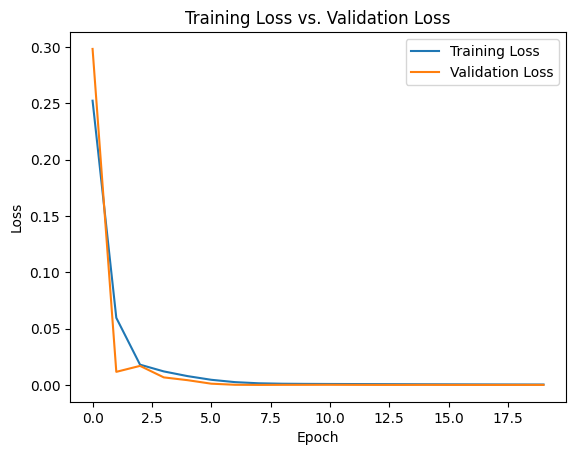

In [223]:
import matplotlib.pyplot as plt

# Plot the training loss and validation loss over the epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss vs. Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.show()


EVALUASI LSTM

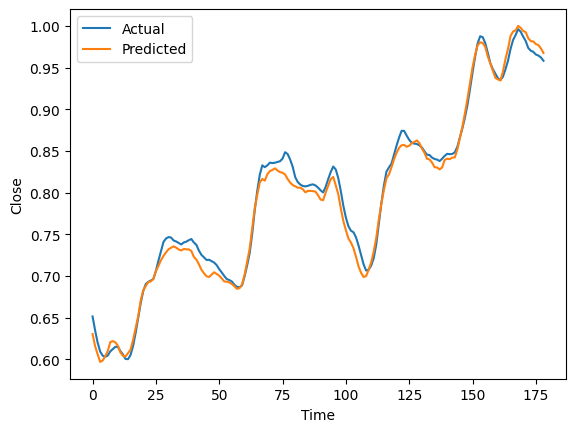

In [224]:
# Mengatur sumbu x dengan indeks data
x = np.arange(len(LSTM_prediction))

# Membuat plot dengan nilai aktual dan prediksi
plt.plot(x, LSTM_prediction, label='Actual')
plt.plot(x, y_test, label='Predicted')

# Menambahkan label pada sumbu x dan y
plt.xlabel('Time')
plt.ylabel('Close')

# Menampilkan legenda
plt.legend()

# Menampilkan plot
plt.show()


In [225]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_test = np.array(y_test).reshape(-1, 1)
LSTM_prediction = np.array(LSTM_prediction).reshape(-1, 1)

# Menghitung MSE
mse = mean_squared_error(LSTM_prediction, y_test)

# Menghitung RMSE
rmse = mean_squared_error(LSTM_prediction, y_test, squared=False)

# Menghitung MAE
mae = mean_absolute_error(LSTM_prediction, y_test)

# Menghitung MAPE
def calculate_mape(y_true, y_pred):
    non_zero_indices = y_true != 0
    mape = np.mean(np.abs((y_true[non_zero_indices] - y_pred[non_zero_indices]) / y_true[non_zero_indices])) * 100
    return mape

mape = calculate_mape(y_test,LSTM_prediction)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE:", mape)

MSE: 0.00011656665945355095
RMSE: 0.010796604070426541
MAE: 0.008810935550985104
MAPE: 1.1360031655665503


LSTM BERT

In [226]:
df_LSTMBERT = df[['Open','High','Low','Close','Adj Close','Volume','SkorSentimen']]
df_LSTMBERT.head()

,Open,High,Low,Close,Adj Close,Volume,SkorSentimen
Date,,,,,,,
2020-07-22,0.031593,0.020848,0.039428,0.026858,0.023439,0.262161,0.310480
2020-07-23,0.027322,0.019783,0.040475,0.030989,0.027045,0.248093,0.178226
2020-07-24,0.025423,0.018246,0.040591,0.030989,0.027045,0.227371,0.290353
2020-07-25,0.024474,0.017477,0.040650,0.030989,0.027045,0.217009,0.290353
2020-07-26,0.020736,0.015348,0.041173,0.032539,0.028397,0.188421,0.359365


In [227]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target (y)
X = df_LSTMBERT.drop('Close', axis=1)
y = df_LSTMBERT['Close']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

MODEL LSTM BERT

In [228]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Initialize the model
model = Sequential()

# Add the first LSTM layer
model.add(LSTM(units=15, return_sequences=True, input_shape=(X_train.shape[1], 1)))

# Add additional LSTM layers
model.add(LSTM(units=15))

# Add a fully connected layer
model.add(Dense(1))

In [229]:
from keras import backend as K

def mean_squared_error(y_true, y_pred):
    return K.mean(K.square(y_pred - y_true), axis=-1)

def mean_absolute_error(y_true, y_pred):
    return K.mean(K.abs(y_pred - y_true), axis=-1)

In [230]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=[mean_squared_error, mean_absolute_error])

from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10, mode='min')

history = model.fit(X_train, y_train, epochs=20, batch_size=32, 
                    validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/20
23/23 [==============================] - 4s 50ms/step - loss: 0.1161 - mean_squared_error: 0.1161 - mean_absolute_error: 0.2908 - val_loss: 0.0437 - val_mean_squared_error: 0.0437 - val_mean_absolute_error: 0.1999
Epoch 2/20
23/23 [==============================] - 0s 8ms/step - loss: 0.0171 - mean_squared_error: 0.0171 - mean_absolute_error: 0.1013 - val_loss: 0.0112 - val_mean_squared_error: 0.0112 - val_mean_absolute_error: 0.0935
Epoch 3/20
23/23 [==============================] - 0s 8ms/step - loss: 0.0112 - mean_squared_error: 0.0112 - mean_absolute_error: 0.0883 - val_loss: 0.0069 - val_mean_squared_error: 0.0069 - val_mean_absolute_error: 0.0725
Epoch 4/20
23/23 [==============================] - 0s 8ms/step - loss: 0.0075 - mean_squared_error: 0.0075 - mean_absolute_error: 0.0672 - val_loss: 0.0056 - val_mean_squared_error: 0.0056 - val_mean_absolute_error: 0.0675
Epoch 5/20
23/23 [==============================] - 0s 8ms/step - loss: 0.0043 - mean_squared_error: 0.

In [231]:
# evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)

In [232]:
# get the range of values in the column
min_value = df['Close'].min()
max_value = df['Close'].max()
value_range = max_value - min_value

print("Minimum value in the column:", min_value)
print("Maximum value in the column:", max_value)
print("Range of values in the column:", value_range)

Minimum value in the column: 0.0
Maximum value in the column: 0.9999999999999998
Range of values in the column: 0.9999999999999998


In [233]:
# Use the model to make predictions on the test data
LSTMBERT_prediction = model.predict(X_test)

6/6 [==============================] - 1s 0s/step


In [234]:
LSTMBERT_prediction.shape

(179, 1)

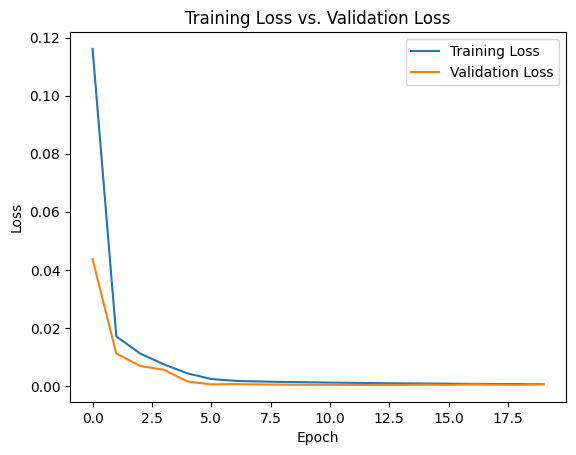

In [235]:
# Plot the training loss and validation loss over the epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss vs. Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.show()


EVALUASI LSTM BERT

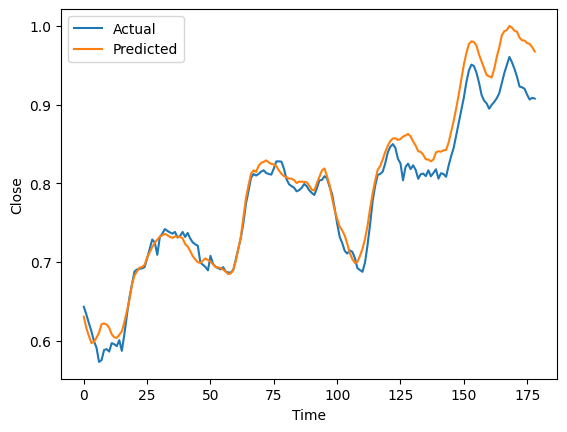

In [236]:
# Mengatur sumbu x dengan indeks data
x = np.arange(len(LSTMBERT_prediction))

# Membuat plot dengan nilai aktual dan prediksi
plt.plot(x, LSTMBERT_prediction, label='Actual')
plt.plot(x, y_test, label='Predicted')

# Menambahkan label pada sumbu x dan y
plt.xlabel('Time')
plt.ylabel('Close')

# Menampilkan legenda
plt.legend()

# Menampilkan plot
plt.show()


In [237]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_test = np.array(y_test).reshape(-1, 1)
LSTMBERT_prediction = np.array(LSTMBERT_prediction).reshape(-1, 1)

# Menghitung MSE
mse = mean_squared_error(LSTMBERT_prediction, y_test)

# Menghitung RMSE
rmse = mean_squared_error(LSTMBERT_prediction, y_test, squared=False)

# Menghitung MAE
mae = mean_absolute_error(LSTMBERT_prediction, y_test)

# Menghitung MAPE
def calculate_mape(y_true, y_pred):
    non_zero_indices = y_true != 0
    mape = np.mean(np.abs((y_true[non_zero_indices] - y_pred[non_zero_indices]) / y_true[non_zero_indices])) * 100
    return mape

mape = calculate_mape(y_test,LSTMBERT_prediction)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE:", mape)

MSE: 0.000650473994177898
RMSE: 0.025504391664532954
MAE: 0.018793340105682888
MAPE: 2.2408845100363504


In [238]:
# df['LSTM_Prediction'] = LSTM_prediction
# df.head()

In [239]:
data = df
data = data.asfreq('D')
data = data.sort_index()

data_ = data.drop(columns=['SkorSentimen'])
data.head()

,Open,High,Low,Close,Adj Close,Volume,SkorSentimen,RSI,MA_5,MA_10,MA_20,S_Osci
Date,,,,,,,,,,,,
2020-07-22,0.031593,0.020848,0.039428,0.026858,0.023439,0.262161,0.310480,0.26242,0.020252,0.014975,0.0,0.3172
2020-07-23,0.027322,0.019783,0.040475,0.030989,0.027045,0.248093,0.178226,0.26242,0.020252,0.014975,0.0,0.3172
2020-07-24,0.025423,0.018246,0.040591,0.030989,0.027045,0.227371,0.290353,0.26242,0.020252,0.014975,0.0,0.3172
2020-07-25,0.024474,0.017477,0.040650,0.030989,0.027045,0.217009,0.290353,0.26242,0.020252,0.014975,0.0,0.3172
2020-07-26,0.020736,0.015348,0.041173,0.032539,0.028397,0.188421,0.359365,0.26242,0.020252,0.014975,0.0,0.3172


In [240]:
data_.head()

,Open,High,Low,Close,Adj Close,Volume,RSI,MA_5,MA_10,MA_20,S_Osci
Date,,,,,,,,,,,
2020-07-22,0.031593,0.020848,0.039428,0.026858,0.023439,0.262161,0.26242,0.020252,0.014975,0.0,0.3172
2020-07-23,0.027322,0.019783,0.040475,0.030989,0.027045,0.248093,0.26242,0.020252,0.014975,0.0,0.3172
2020-07-24,0.025423,0.018246,0.040591,0.030989,0.027045,0.227371,0.26242,0.020252,0.014975,0.0,0.3172
2020-07-25,0.024474,0.017477,0.040650,0.030989,0.027045,0.217009,0.26242,0.020252,0.014975,0.0,0.3172
2020-07-26,0.020736,0.015348,0.041173,0.032539,0.028397,0.188421,0.26242,0.020252,0.014975,0.0,0.3172


In [241]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume,SkorSentimen,RSI,MA_5,MA_10,MA_20,S_Osci
Date,,,,,,,,,,,,
2022-12-25,0.993147,0.992583,0.997121,0.981346,0.982667,0.028295,0.907540,0.560925,0.990881,1.000000,0.997041,0.758857
2022-12-26,0.990798,0.989070,0.995970,0.978221,0.979763,0.012575,0.741315,0.541323,0.987688,0.998993,0.997211,0.701778
2022-12-27,0.990504,0.987314,0.994818,0.977085,0.978708,0.005706,0.583400,0.532459,0.984552,0.997321,0.997922,0.644153
2022-12-28,0.988938,0.983800,0.991364,0.972918,0.974836,0.009632,0.716553,0.506267,0.982071,0.995083,0.998878,0.525577
2022-12-29,0.984826,0.978238,0.985607,0.967521,0.969821,0.017216,0.786770,0.474760,0.979185,0.991729,1.000000,0.398725


In [242]:
data_.tail()

,Open,High,Low,Close,Adj Close,Volume,RSI,MA_5,MA_10,MA_20,S_Osci
Date,,,,,,,,,,,
2022-12-25,0.993147,0.992583,0.997121,0.981346,0.982667,0.028295,0.560925,0.990881,1.000000,0.997041,0.758857
2022-12-26,0.990798,0.989070,0.995970,0.978221,0.979763,0.012575,0.541323,0.987688,0.998993,0.997211,0.701778
2022-12-27,0.990504,0.987314,0.994818,0.977085,0.978708,0.005706,0.532459,0.984552,0.997321,0.997922,0.644153
2022-12-28,0.988938,0.983800,0.991364,0.972918,0.974836,0.009632,0.506267,0.982071,0.995083,0.998878,0.525577
2022-12-29,0.984826,0.978238,0.985607,0.967521,0.969821,0.017216,0.474760,0.979185,0.991729,1.000000,0.398725


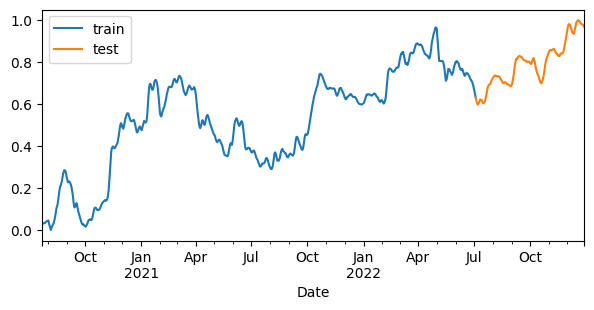

In [243]:
end_train        = '2022-07-4'
fig, ax=plt.subplots(figsize=(7, 3))
data['Close'].loc[:end_train].plot(ax=ax, label='train')
data['Close'].loc[end_train:].plot(ax=ax, label='test')
ax.legend();

data_train = data.loc[:end_train]
data_test  = data.loc[end_train:]

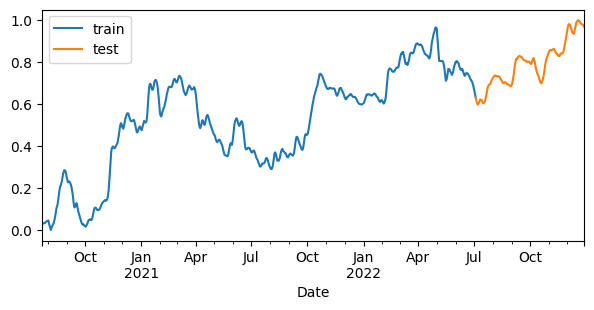

In [244]:
end_train        = '2022-07-4'
fig, ax=plt.subplots(figsize=(7, 3))
data_['Close'].loc[:end_train].plot(ax=ax, label='train')
data_['Close'].loc[end_train:].plot(ax=ax, label='test')
ax.legend();

data__train = data_.loc[:end_train]
data__test  = data_.loc[end_train:]

In [245]:
print(data_train.shape[0])
print(data_test.shape[0])

713
179


In [246]:
print(data__train.shape[0])
print(data__test.shape[0])

713
179


MODEL XGBOOST

In [247]:
# Models to compare
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregDirect import ForecasterAutoregDirect
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster
from sklearn.feature_selection import mutual_info_regression
from sklearn.decomposition import PCA
from datetime import datetime, timedelta

models = [XGBRegressor(random_state=123)]

# Hyperparameter to search for each model
param_grids = {'XGRegressor': { 
                                'max_depth'          :  [150,200,300,400,500],
                                # 'min_child_weight'   :  [0.3],
                                'n_estimators'       :  [80,100,150,200], 
                                'learning_rate'      :  [0.1,0.2],
                                # 'random_state'       :  [3],
                                # 'max_delta_step'     :  [0.8],
                                # 'subsample'          :  [0.8],
                                # 'colsample_bytree'   :  [0.8],
                                # 'num_round'          :  [5],
                                # 'gamma'              :  [0],
                                # 'reg_alpha'          :  [5],
                                # 'reg_lambda'         :  [0.4]
                               }}
lags    =   2
# Lags used as predictors
lags_grid = [lags]

df_results = pd.DataFrame()
for i, model in enumerate(models):

    print(f"Grid search for regressor: {model}")
    print(f"-------------------------")

    forecaster = ForecasterAutoreg(
                     regressor = model,
                     lags      = [lags]
                 )

    # Regressor hyperparameters
    param_grid = param_grids[list(param_grids)[i]]
    results_grid = grid_search_forecaster(
                       forecaster         = forecaster,
                       y                  = data.loc[:end_train, 'Close'],
                       param_grid         = param_grid,
                       lags_grid          = lags_grid,
                       steps              = len(data_test),
                       refit              = True,
                       metric             = 'mean_absolute_error',
                       initial_train_size = 700,
                       fixed_train_size   = True,
                       return_best        = False,
                        n_jobs             = 'auto',
                       verbose            = False,
                       show_progress      = False
                   )
    
    # Create a column with model name
    results_grid['model'] = list(param_grids)[i]
    df_results = pd.concat([df_results, results_grid])
df_results = df_results.sort_values(by='mean_absolute_error')
df_results.to_csv('_Batch_XGBOOST_Hyp.csv', index=False)
df_results.head(100)

Grid search for regressor: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=123, ...)
-------------------------
Number of models compared: 40.


,lags,params,mean_absolute_error,learning_rate,max_depth,n_estimators,model
39,"[1, 2]","{'learning_rate': 0.2, 'max_depth': 500, 'n_es...",0.035790,0.2,500.0,200.0,XGRegressor
20,"[1, 2]","{'learning_rate': 0.2, 'max_depth': 150, 'n_es...",0.035790,0.2,150.0,80.0,XGRegressor
37,"[1, 2]","{'learning_rate': 0.2, 'max_depth': 500, 'n_es...",0.035790,0.2,500.0,100.0,XGRegressor
36,"[1, 2]","{'learning_rate': 0.2, 'max_depth': 500, 'n_es...",0.035790,0.2,500.0,80.0,XGRegressor
35,"[1, 2]","{'learning_rate': 0.2, 'max_depth': 400, 'n_es...",0.035790,0.2,400.0,200.0,XGRegressor
34,"[1, 2]","{'learning_rate': 0.2, 'max_depth': 400, 'n_es...",0.035790,0.2,400.0,150.0,XGRegressor
33,"[1, 2]","{'learning_rate': 0.2, 'max_depth': 400, 'n_es...",0.035790,0.2,400.0,100.0,XGRegressor
32,"[1, 2]","{'learning_rate': 0.2, 'max_depth': 400, 'n_es...",0.035790,0.2,400.0,80.0,XGRegressor
31,"[1, 2]","{'learning_rate': 0.2, 'max_depth': 300, 'n_es...",0.035790,0.2,300.0,200.0,XGRegressor
30,"[1, 2]","{'learning_rate': 0.2, 'max_depth': 300, 'n_es...",0.035790,0.2,300.0,150.0,XGRegressor


In [248]:
df_results = df_results.sort_values(by='mean_absolute_error')
best_parameter = df_results.iloc[0]
best_parameter.head()

lags                                                              [1, 2]
params                 {'learning_rate': 0.2, 'max_depth': 500, 'n_es...
mean_absolute_error                                              0.03579
learning_rate                                                        0.2
max_depth                                                          500.0
Name: 39, dtype: object

In [249]:
print(
    f"Train dates      : {data.index.min()} --- {data.loc[:end_train].index.max()}"
    f"  (n={len(data.loc[:end_train])})"
)
print(
    f"Test dates       : {data.loc[end_train:].index.min()} --- {data.index.max()}"
    f" (n={len(data.loc[end_train:])})"
)

Train dates      : 2020-07-22 00:00:00 --- 2022-07-04 00:00:00  (n=713)
Test dates       : 2022-07-04 00:00:00 --- 2022-12-29 00:00:00 (n=179)


In [250]:
XGB_model = XGBRegressor(
                max_depth               = int(best_parameter['max_depth']),
                n_estimators            = int(best_parameter['n_estimators']),
                learning_rate           = best_parameter['learning_rate'],
                # min_child_weight        = best_parameter['min_child_weight'],
                # random_state            = int(best_parameter['random_state']),
                # max_delta_step          = best_parameter['max_delta_step'],
                # reg_alpha               = best_parameter['reg_alpha'],
                # reg_lambda              = best_parameter['reg_lambda'],
                # subsample               = best_parameter['subsample'],
                # colsample_bytree        = best_parameter['colsample_bytree'],
                # num_round               = best_parameter['num_round'],
                # gamma                   = best_parameter['gamma'],
                # reg_alpha               = best_parameter['reg_alpha'],
                # refit                   = True,
                # objective               ='reg:linear',
                booster                 ='dart'
                # tree_method             = 'hist',
                # colsample_bytree        = 0.4
            )

# Create forecaster 
forecaster = ForecasterAutoregDirect(
                 regressor      = XGB_model,
                 lags           = lags,
                 steps          = len(data_test),
                 transformer_y  = None,
                 n_jobs         = 'auto')

forecaster.fit(y=data.loc[:end_train,'Close'], exog= data.loc[:end_train,['High','Low','Open','Adj Close','Volume','RSI','MA_5','MA_10','MA_20','S_Osci','SkorSentimen']])
forecaster

ForecasterAutoregDirect 
Regressor: XGBRegressor(base_score=None, booster='dart', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=500, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...) 
Lags: [1 2] 
Transformer for y: None 
Transformer for exog: None 
Weight function included: False 
Window size: 2 
Maximum steps predicted: 179 
Exogenous included: True 
Type of exogenous variable: <class 'pandas.core.fra

In [251]:
predictions_xgboost = forecaster.predict(steps=len(data.loc['2022-07-05':]), exog=data.loc['2022-07-05':,['High','Low','Open','Adj Close','Volume','RSI','MA_5','MA_10','MA_20','S_Osci','SkorSentimen']])
predictions_xgboost.tail(30)

2022-11-30    0.933051
2022-12-01    0.943423
2022-12-02    0.957737
2022-12-03    0.963764
2022-12-04    0.963666
2022-12-05    0.962427
2022-12-06    0.963656
2022-12-07    0.962094
2022-12-08    0.952722
2022-12-09    0.943300
2022-12-10    0.933501
2022-12-11    0.926776
2022-12-12    0.930020
2022-12-13    0.943430
2022-12-14    0.940465
2022-12-15    0.958911
2022-12-16    0.963575
2022-12-17    0.962030
2022-12-18    0.963557
2022-12-19    0.963485
2022-12-20    0.963694
2022-12-21    0.961820
2022-12-22    0.963614
2022-12-23    0.962500
2022-12-24    0.962630
2022-12-25    0.962224
2022-12-26    0.962817
2022-12-27    0.963617
2022-12-28    0.963428
2022-12-29    0.963418
Name: pred, dtype: float32

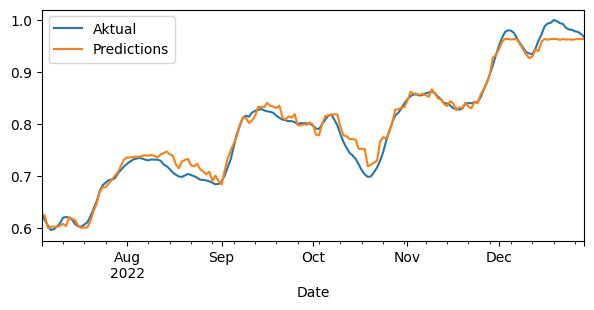

In [252]:
fig, ax = plt.subplots(figsize = (7,3))
data_test['Close'].plot(ax=ax, label=('Aktual'))
predictions_xgboost.plot(ax=ax, label='Predictions')
ax.legend()

EVALUASI XGBOOST-BERT

In [253]:
y = data_test['Close'][1:]

from sklearn.metrics import mean_squared_error, mean_absolute_error

# # Melakukan prediksi pada data test   
# y_pred = grid_search.predict(testX)

# Menghitung MSE
mse = mean_squared_error(y, predictions_xgboost)

# Menghitung RMSE
rmse = mean_squared_error(y, predictions_xgboost, squared=False)

# Menghitung MAE
mae = mean_absolute_error(y, predictions_xgboost)

# Mengghitung MAPE
def calculate_mape(y_true, y_pred):
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return mape

mape = calculate_mape(y, predictions_xgboost)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE:", mape)

MSE: 0.00022016519099703996
RMSE: 0.014837964516639065
MAE: 0.010976877944929821
MAPE: 1.4087867536113252


XGBOOST ONLY

In [254]:
# Models to compare
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregDirect import ForecasterAutoregDirect
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster
from sklearn.feature_selection import mutual_info_regression
from sklearn.decomposition import PCA
from datetime import datetime, timedelta

models = [XGBRegressor(random_state=123)]

# Hyperparameter to search for each model
param_grids = {'XGRegressor': { 
                                'max_depth'          :  [150,200,300,400,500],
                                # 'min_child_weight'   :  [0.3],
                                'n_estimators'       :  [80,100,150,200], 
                                'learning_rate'      :  [0.1,0.2],
                                # 'random_state'       :  [3],
                                # 'max_delta_step'     :  [0.8],
                                # 'subsample'          :  [0.8],
                                # 'colsample_bytree'   :  [0.8],
                                # 'num_round'          :  [5],
                                # 'gamma'              :  [0],
                                # 'reg_alpha'          :  [5],
                                # 'reg_lambda'         :  [0.4]
                               }}
lags    =   2
# Lags used as predictors
lags_grid = [lags]

df_results = pd.DataFrame()
for i, model in enumerate(models):

    print(f"Grid search for regressor: {model}")
    print(f"-------------------------")

    forecaster = ForecasterAutoreg(
                     regressor = model,
                     lags      = [lags]
                 )

    # Regressor hyperparameters
    param_grid = param_grids[list(param_grids)[i]]
    results_grid = grid_search_forecaster(
                       forecaster         = forecaster,
                       y                  = data_.loc[:end_train, 'Close'],
                       param_grid         = param_grid,
                       lags_grid          = lags_grid,
                       steps              = len(data__test),
                       refit              = True,
                       metric             = 'mean_absolute_error',
                       initial_train_size = 700,
                       fixed_train_size   = True,
                       return_best        = False,
                        n_jobs             = 'auto',
                       verbose            = False,
                       show_progress      = False
                   )
    
    # Create a column with model name
    results_grid['model'] = list(param_grids)[i]
    df_results = pd.concat([df_results, results_grid])
df_results = df_results.sort_values(by='mean_absolute_error')
df_results.to_csv('_Batch_XGBOOST_Hyp.csv', index=False)
df_results.head(100)

Grid search for regressor: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=123, ...)
-------------------------
Number of models compared: 40.


,lags,params,mean_absolute_error,learning_rate,max_depth,n_estimators,model
39,"[1, 2]","{'learning_rate': 0.2, 'max_depth': 500, 'n_es...",0.035790,0.2,500.0,200.0,XGRegressor
20,"[1, 2]","{'learning_rate': 0.2, 'max_depth': 150, 'n_es...",0.035790,0.2,150.0,80.0,XGRegressor
37,"[1, 2]","{'learning_rate': 0.2, 'max_depth': 500, 'n_es...",0.035790,0.2,500.0,100.0,XGRegressor
36,"[1, 2]","{'learning_rate': 0.2, 'max_depth': 500, 'n_es...",0.035790,0.2,500.0,80.0,XGRegressor
35,"[1, 2]","{'learning_rate': 0.2, 'max_depth': 400, 'n_es...",0.035790,0.2,400.0,200.0,XGRegressor
34,"[1, 2]","{'learning_rate': 0.2, 'max_depth': 400, 'n_es...",0.035790,0.2,400.0,150.0,XGRegressor
33,"[1, 2]","{'learning_rate': 0.2, 'max_depth': 400, 'n_es...",0.035790,0.2,400.0,100.0,XGRegressor
32,"[1, 2]","{'learning_rate': 0.2, 'max_depth': 400, 'n_es...",0.035790,0.2,400.0,80.0,XGRegressor
31,"[1, 2]","{'learning_rate': 0.2, 'max_depth': 300, 'n_es...",0.035790,0.2,300.0,200.0,XGRegressor
30,"[1, 2]","{'learning_rate': 0.2, 'max_depth': 300, 'n_es...",0.035790,0.2,300.0,150.0,XGRegressor


In [255]:
XGB_model = XGBRegressor(
                max_depth               = int(best_parameter['max_depth']),
                n_estimators            = int(best_parameter['n_estimators']),
                learning_rate           = best_parameter['learning_rate'],
                # min_child_weight        = best_parameter['min_child_weight'],
                # random_state            = int(best_parameter['random_state']),
                # max_delta_step          = best_parameter['max_delta_step'],
                # reg_alpha               = best_parameter['reg_alpha'],
                # reg_lambda              = best_parameter['reg_lambda'],
                # subsample               = best_parameter['subsample'],
                # colsample_bytree        = best_parameter['colsample_bytree'],
                # num_round               = best_parameter['num_round'],
                # gamma                   = best_parameter['gamma'],
                # reg_alpha               = best_parameter['reg_alpha'],
                # refit                   = True,
                # objective               ='reg:linear',
                booster                 ='dart'
                # tree_method             = 'hist',
                # colsample_bytree        = 0.4
            )

# Create forecaster 
forecaster_only = ForecasterAutoregDirect(
                 regressor      = XGB_model,
                 lags           = lags,
                 steps          = len(data__test),
                 transformer_y  = None,
                 n_jobs         = 'auto')

forecaster_only.fit(y=data_.loc[:end_train,'Close'], exog= data_.loc[:end_train,['High','Low','Open','Adj Close','Volume','RSI','MA_5','MA_10','MA_20','S_Osci']])
forecaster_only

ForecasterAutoregDirect 
Regressor: XGBRegressor(base_score=None, booster='dart', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=500, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...) 
Lags: [1 2] 
Transformer for y: None 
Transformer for exog: None 
Weight function included: False 
Window size: 2 
Maximum steps predicted: 179 
Exogenous included: True 
Type of exogenous variable: <class 'pandas.core.fra

In [256]:
predictions_xgboostonly = forecaster_only.predict(steps=len(data_.loc['2022-07-05':]), exog=data_.loc['2022-07-05':,['High','Low','Open','Adj Close','Volume','RSI','MA_5','MA_10','MA_20','S_Osci']])
predictions_xgboostonly.tail(30)

2022-11-30    0.934603
2022-12-01    0.943684
2022-12-02    0.958618
2022-12-03    0.963648
2022-12-04    0.963807
2022-12-05    0.963624
2022-12-06    0.963620
2022-12-07    0.963483
2022-12-08    0.950978
2022-12-09    0.943010
2022-12-10    0.933966
2022-12-11    0.927154
2022-12-12    0.929791
2022-12-13    0.949861
2022-12-14    0.939955
2022-12-15    0.959403
2022-12-16    0.963631
2022-12-17    0.963481
2022-12-18    0.963656
2022-12-19    0.963672
2022-12-20    0.963659
2022-12-21    0.963553
2022-12-22    0.961230
2022-12-23    0.961041
2022-12-24    0.961770
2022-12-25    0.961339
2022-12-26    0.962539
2022-12-27    0.962505
2022-12-28    0.962672
2022-12-29    0.963407
Name: pred, dtype: float32

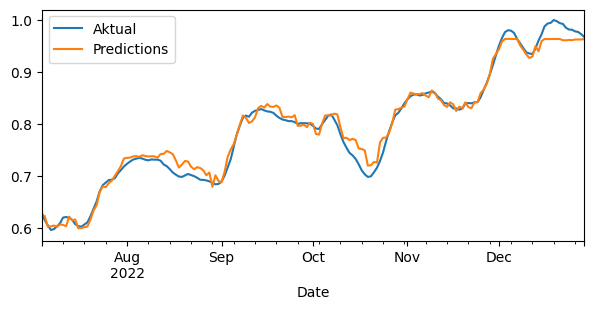

In [257]:
fig, ax = plt.subplots(figsize = (7,3))
data__test['Close'].plot(ax=ax, label=('Aktual'))
predictions_xgboostonly.plot(ax=ax, label='Predictions')
ax.legend()

In [258]:
y = data__test['Close'][1:]

from sklearn.metrics import mean_squared_error, mean_absolute_error

# # Melakukan prediksi pada data test   
# y_pred = grid_search.predict(testX)

# Menghitung MSE
mse = mean_squared_error(y, predictions_xgboostonly)

# Menghitung RMSE
rmse = mean_squared_error(y, predictions_xgboostonly, squared=False)

# Menghitung MAE
mae = mean_absolute_error(y, predictions_xgboostonly)

# Mengghitung MAPE
def calculate_mape(y_true, y_pred):
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return mape

mape = calculate_mape(y, predictions_xgboostonly)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE:", mape)

MSE: 0.000215626454054306
RMSE: 0.014684224666433907
MAE: 0.010976730098898728
MAPE: 1.4063973098522289


KOMPARASI

In [259]:
df = df.iloc[713:]

In [260]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 178 entries, 2022-07-05 to 2022-12-29
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          178 non-null    float64
 1   High          178 non-null    float64
 2   Low           178 non-null    float64
 3   Close         178 non-null    float64
 4   Adj Close     178 non-null    float64
 5   Volume        178 non-null    float64
 6   SkorSentimen  178 non-null    float64
 7   RSI           178 non-null    float64
 8   MA_5          178 non-null    float64
 9   MA_10         178 non-null    float64
 10  MA_20         178 non-null    float64
 11  S_Osci        178 non-null    float64
dtypes: float64(12)
memory usage: 18.1 KB


In [261]:
df['LSTM'] = LSTM_prediction[1:]
df.head()

,Open,High,Low,Close,Adj Close,Volume,SkorSentimen,RSI,MA_5,MA_10,MA_20,S_Osci,LSTM
Date,,,,,,,,,,,,,
2022-07-05,0.620455,0.632873,0.620976,0.615931,0.643132,0.289954,0.521200,0.020841,0.643392,0.673141,0.716064,0.117373,0.634870
2022-07-06,0.605967,0.619211,0.606007,0.606083,0.633981,0.278289,0.577554,0.009681,0.629695,0.661781,0.709284,0.146324,0.620157
2022-07-07,0.596569,0.608964,0.594492,0.596992,0.625535,0.270295,0.577554,0.000000,0.617229,0.649981,0.701828,0.164099,0.609389
2022-07-08,0.588933,0.606915,0.594780,0.598697,0.627118,0.243918,0.428521,0.032957,0.607611,0.638914,0.694062,0.199556,0.604502
2022-07-09,0.588345,0.606525,0.599002,0.603810,0.631869,0.205617,0.335140,0.073377,0.602205,0.629197,0.686465,0.238975,0.603129


In [262]:
df['LSTM_BERT'] = LSTMBERT_prediction[1:]
df.head()

,Open,High,Low,Close,Adj Close,Volume,SkorSentimen,RSI,MA_5,MA_10,MA_20,S_Osci,LSTM,LSTM_BERT
Date,,,,,,,,,,,,,,
2022-07-05,0.620455,0.632873,0.620976,0.615931,0.643132,0.289954,0.521200,0.020841,0.643392,0.673141,0.716064,0.117373,0.634870,0.633342
2022-07-06,0.605967,0.619211,0.606007,0.606083,0.633981,0.278289,0.577554,0.009681,0.629695,0.661781,0.709284,0.146324,0.620157,0.622215
2022-07-07,0.596569,0.608964,0.594492,0.596992,0.625535,0.270295,0.577554,0.000000,0.617229,0.649981,0.701828,0.164099,0.609389,0.612025
2022-07-08,0.588933,0.606915,0.594780,0.598697,0.627118,0.243918,0.428521,0.032957,0.607611,0.638914,0.694062,0.199556,0.604502,0.599251
2022-07-09,0.588345,0.606525,0.599002,0.603810,0.631869,0.205617,0.335140,0.073377,0.602205,0.629197,0.686465,0.238975,0.603129,0.591294


In [263]:
df['XGBOOST'] = predictions_xgboost
df.head()

,Open,High,Low,Close,Adj Close,Volume,SkorSentimen,RSI,MA_5,MA_10,MA_20,S_Osci,LSTM,LSTM_BERT,XGBOOST
Date,,,,,,,,,,,,,,,
2022-07-05,0.620455,0.632873,0.620976,0.615931,0.643132,0.289954,0.521200,0.020841,0.643392,0.673141,0.716064,0.117373,0.634870,0.633342,0.624833
2022-07-06,0.605967,0.619211,0.606007,0.606083,0.633981,0.278289,0.577554,0.009681,0.629695,0.661781,0.709284,0.146324,0.620157,0.622215,0.601400
2022-07-07,0.596569,0.608964,0.594492,0.596992,0.625535,0.270295,0.577554,0.000000,0.617229,0.649981,0.701828,0.164099,0.609389,0.612025,0.603430
2022-07-08,0.588933,0.606915,0.594780,0.598697,0.627118,0.243918,0.428521,0.032957,0.607611,0.638914,0.694062,0.199556,0.604502,0.599251,0.603587
2022-07-09,0.588345,0.606525,0.599002,0.603810,0.631869,0.205617,0.335140,0.073377,0.602205,0.629197,0.686465,0.238975,0.603129,0.591294,0.603100


In [264]:
df['XGBOOSTOnly'] = predictions_xgboostonly
df.head()

,Open,High,Low,Close,Adj Close,Volume,SkorSentimen,RSI,MA_5,MA_10,MA_20,S_Osci,LSTM,LSTM_BERT,XGBOOST,XGBOOSTOnly
Date,,,,,,,,,,,,,,,,
2022-07-05,0.620455,0.632873,0.620976,0.615931,0.643132,0.289954,0.521200,0.020841,0.643392,0.673141,0.716064,0.117373,0.634870,0.633342,0.624833,0.623562
2022-07-06,0.605967,0.619211,0.606007,0.606083,0.633981,0.278289,0.577554,0.009681,0.629695,0.661781,0.709284,0.146324,0.620157,0.622215,0.601400,0.603333
2022-07-07,0.596569,0.608964,0.594492,0.596992,0.625535,0.270295,0.577554,0.000000,0.617229,0.649981,0.701828,0.164099,0.609389,0.612025,0.603430,0.603903
2022-07-08,0.588933,0.606915,0.594780,0.598697,0.627118,0.243918,0.428521,0.032957,0.607611,0.638914,0.694062,0.199556,0.604502,0.599251,0.603587,0.605621
2022-07-09,0.588345,0.606525,0.599002,0.603810,0.631869,0.205617,0.335140,0.073377,0.602205,0.629197,0.686465,0.238975,0.603129,0.591294,0.603100,0.603196


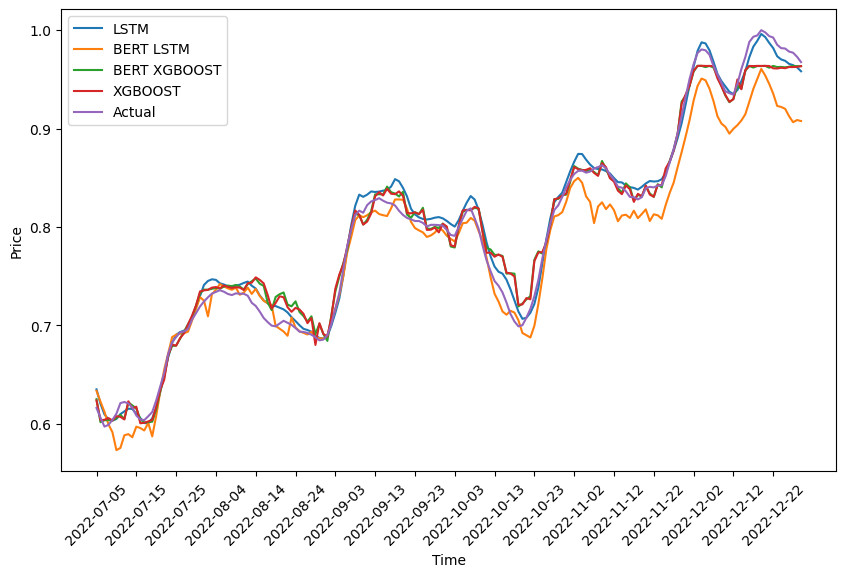

In [265]:
x = df.index  # Menggunakan indeks df_BERTLSTM sebagai label sumbu x

# Mengatur ukuran gambar
plt.figure(figsize=(10, 6))  # Ukuran gambar 10x6 inci (lebar x tinggi)

# Membuat plot dengan nilai aktual dan prediksi
plt.plot(x, df['LSTM'], label='LSTM')
plt.plot(x, df['LSTM_BERT'], label='BERT LSTM')
plt.plot(x, df['XGBOOST'], label='BERT XGBOOST')
plt.plot(x, df['XGBOOSTOnly'], label='XGBOOST')
plt.plot(x, df['Close'], label='Actual')

# Menambahkan label pada sumbu x dan y
plt.xlabel('Time')
plt.ylabel('Price')


# Mengatur label tanggal yang ingin ditampilkan (contoh: tiap 10 hari)
plt.xticks(x[::10], rotation=45)  # Menampilkan label setiap 10 hari dengan rotasi 45 derajat

# Menampilkan legenda
plt.legend()

# Menampilkan plot
plt.show()